In [2]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Importando bibliotecas

# Importando Dataset
Nesse primeiro momento vamos apenas importar a base de dados do treinamento para calcular as medidas desejadas. Posteriormente importaremos os dados de teste para testar com o melhor modelo possível

In [3]:
dataframe = read_csv("https://raw.githubusercontent.com/zahangirbd/medical_data_for_classification/master/data/Hepatitis/hepatitis.data.train.csv", na_values=['?'])
dataframe

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,CLASS
0,23,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,1,2
1,43,1,2,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.2,100.0,19.0,3.1,42.0,2,1
2,48,1,1,2,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,4.8,123.0,157.0,2.7,31.0,2,1
3,34,1,1,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.8,127.0,182.0,NaN,NaN,1,1
4,36,1,1,2,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,0.8,85.0,44.0,4.2,85.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,32,1,2,1,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,59.0,249.0,3.7,54.0,1,2
76,28,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,85.0,31.0,4.9,NaN,1,2
77,61,1,1,2,1.0,1.0,2.0,NaN,NaN,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2,1
78,24,1,1,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,34.0,4.1,NaN,2,2


Note que os valores antes como '?' mudaram para NaN, o que irá nos permitir calcular a média e desvio padrão dos atributos sem dar erro no código

# Calculando Média e desvios padrão

In [4]:
for attribute in dataframe:
    print(f'media de {attribute}: {dataframe[attribute].mean()}')
    print(f'desvio padrão de {attribute}: {dataframe[attribute].std()} \n')


media de AGE: 39.7375
desvio padrão de AGE: 12.65185607036835 

media de SEX: 1.1125
desvio padrão de SEX: 0.3179742048291164 

media de STEROID: 1.5
desvio padrão de STEROID: 0.5031546054266276 

media de ANTIVIRALS: 1.875
desvio padrão de ANTIVIRALS: 0.33280548924392167 

media de FATIGUE: 1.3291139240506329
desvio padrão de FATIGUE: 0.47289395426789116 

media de MALAISE: 1.6075949367088607
desvio padrão de MALAISE: 0.49140618529724817 

media de ANOREXIA: 1.7848101265822784
desvio padrão de ANOREXIA: 0.413579932929269 

media de LIVER_BIG: 1.7866666666666666
desvio padrão de LIVER_BIG: 0.41241979837307774 

media de LIVER_FIRM: 1.5405405405405406
desvio padrão de LIVER_FIRM: 0.5017555260512748 

media de SPLEEN_PALPABLE: 1.7532467532467533
desvio padrão de SPLEEN_PALPABLE: 0.43394894666502914 

media de SPIDERS: 1.6493506493506493
desvio padrão de SPIDERS: 0.48030236546295463 

media de ASCITES: 1.8571428571428572
desvio padrão de ASCITES: 0.3522217346728334 

media de VARICES: 1.8

# Lidando com valores NaN no dataframe

Antes de seguirmos, precisamos decidir o que fazer com os valores NaN do nosso dataframe. Primeiro vamos descobrir quantos deles temos em cada um dos atributos da nossa tabela.

In [5]:
dataframe.isnull().sum()

AGE                 0
SEX                 0
STEROID             0
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG           5
LIVER_FIRM          6
SPLEEN_PALPABLE     3
SPIDERS             3
ASCITES             3
VARICES             3
BILIRUBIN           3
ALK_PHOSPHATE      17
SGOT                4
ALBUMIN            10
PROTIME            38
HISTOLOGY           0
CLASS               0
dtype: int64

Como quase todas as colunas possuem algum NaN, excluir as linhas ou colunas pode não ser uma boa estratégia considerando nossa perda de dados. Com isso em mente, vamos substituir os valores NaN nas colunas por sua respectiva média.

In [6]:
for attribute in dataframe:
    if dataframe[attribute].isnull().any():
        dataframe[attribute] = dataframe[attribute].fillna(dataframe[attribute].mean())
dataframe

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,CLASS
0,23,1,2,2,2.0,2.0,2.0,2.000000,2.000000,2.0,2.0,2.0,2.0,1.000000,114.095238,98.657895,3.828571,59.952381,1,2
1,43,1,2,2,1.0,2.0,2.0,2.000000,2.000000,1.0,1.0,1.0,2.0,1.200000,100.000000,19.000000,3.100000,42.000000,2,1
2,48,1,1,2,1.0,1.0,2.0,2.000000,1.000000,2.0,1.0,1.0,1.0,4.800000,123.000000,157.000000,2.700000,31.000000,2,1
3,34,1,1,2,1.0,1.0,2.0,1.000000,1.000000,2.0,1.0,2.0,2.0,2.800000,127.000000,182.000000,3.828571,59.952381,1,1
4,36,1,1,2,2.0,2.0,2.0,2.000000,2.000000,1.0,2.0,2.0,2.0,0.800000,85.000000,44.000000,4.200000,85.000000,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,32,1,2,1,1.0,2.0,2.0,2.000000,1.000000,2.0,1.0,2.0,2.0,1.000000,59.000000,249.000000,3.700000,54.000000,1,2
76,28,1,2,2,2.0,2.0,2.0,2.000000,2.000000,2.0,2.0,2.0,2.0,0.700000,85.000000,31.000000,4.900000,59.952381,1,2
77,61,1,1,2,1.0,1.0,2.0,1.786667,1.540541,2.0,1.0,2.0,2.0,1.455844,114.095238,98.657895,3.828571,59.952381,2,1
78,24,1,1,2,1.0,2.0,2.0,2.000000,2.000000,2.0,2.0,2.0,2.0,1.000000,114.095238,34.000000,4.100000,59.952381,2,2


# Arvore de Decisão

antes de mais nada vamos separar nossos dados em dados de teste e treino aleatoriamente

In [7]:
train, test = train_test_split(dataframe, test_size = 0.1, random_state= 1)
x_train = train.drop('CLASS', axis = 1)
y_train = train['CLASS']
x_test = test.drop('CLASS', axis = 1)
y_test = test['CLASS']

Agora que separamos os nossos dados em teste e treinamento, vamos construir o nosso modelo de arvore decisão com auxilio da biblioteca stklearn

In [8]:
decision_tree = DecisionTreeClassifier()

### Verificando acuracia do nosso modelo

In [9]:
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
results = cross_val_score(decision_tree, x_train, y_train, cv=kfold, scoring='accuracy')
result = results.mean()
result

0.794642857142857

No entanto, podemos perceber que o cross_val_score não treina a nossa instância de 'decision_tree'. Caso tentemos utilizar o método 'predict', retornará o seguinte erro: 
- 'NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.'

### Treinando o modelo

In [10]:
#y_pred = cross_val_predict(decision_tree, x_train, y_train, cv=10)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

### Matriz de confusão

In [11]:
confusion_matrix(y_test, y_pred)

array([[1, 0],
       [0, 7]])

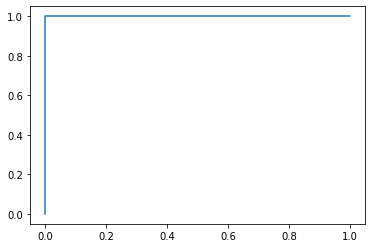

In [17]:
false_positive, true_positive, _ = roc_curve(y_test, y_pred, pos_label=2)
pyplot.plot(false_positive, true_positive)
pyplot.show()



### Curva de ROC e AUC